In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [42]:
def plot_both(df1,df2,df3,file_name):
    mean_df = pd.concat([df1, df2, df3]).groupby('epoch').mean().reset_index()
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

    axes[0].plot(mean_df['epoch'], mean_df['train_loss'], label='Train', color='blue', linewidth=2)
    axes[0].plot(mean_df['epoch'], mean_df['eval_loss'], label='Val', color='orange', linewidth=2)
    axes[0].legend()

    axes[0].plot(df1['epoch'], df1['train_loss'], label='Train', color='blue', alpha=0.3)
    axes[0].plot(df1['epoch'], df1['eval_loss'], label='Val', color='orange', alpha=0.3)
    axes[0].plot(df2['epoch'], df2['train_loss'], label='Train', color='blue', alpha=0.3)
    axes[0].plot(df2['epoch'], df2['eval_loss'], label='Val', color='orange', alpha=0.3)
    axes[0].plot(df3['epoch'], df3['train_loss'], label='Train', color='blue', alpha=0.3)
    axes[0].plot(df3['epoch'], df3['eval_loss'], label='Val', color='orange', alpha=0.3)


    axes[0].set_title("Loss")
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')

    axes[1].plot(mean_df['epoch'], mean_df['train_accuracy'], label='Train', color='blue', linewidth=2)
    axes[1].plot(mean_df['epoch'], mean_df['eval_accuracy'], label='Val', color='orange', linewidth=2)
    axes[1].legend()

    axes[1].plot(df1['epoch'], df1['train_accuracy'], label='Train', color='blue', alpha=0.3)
    axes[1].plot(df1['epoch'], df1['eval_accuracy'], label='Val', color='orange', alpha=0.3)
    axes[1].plot(df2['epoch'], df2['train_accuracy'], label='Train', color='blue', alpha=0.3)
    axes[1].plot(df2['epoch'], df2['eval_accuracy'], label='Val', color='orange', alpha=0.3)
    axes[1].plot(df3['epoch'], df3['train_accuracy'], label='Train', color='blue', alpha=0.3)
    axes[1].plot(df3['epoch'], df3['eval_accuracy'], label='Val', color='orange', alpha=0.3)


    axes[1].set_title("Accuracy")
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_ylim(0, 1)
    axes[0].set_xticks(np.arange(1, 6, 1))
    axes[1].set_xticks(np.arange(1, 6, 1))
    
    
    plt.tight_layout()
    plt.savefig(file_name)
    plt.show()

In [44]:
import os

folders = os.listdir('whisper/checkpoints/pretrained')
folders = [folder.split('_seed_')[0] for folder in folders]
folders = list(set(folders))
folders

['Teapack1_whisper_tiny_finetuned_no_go_kws']

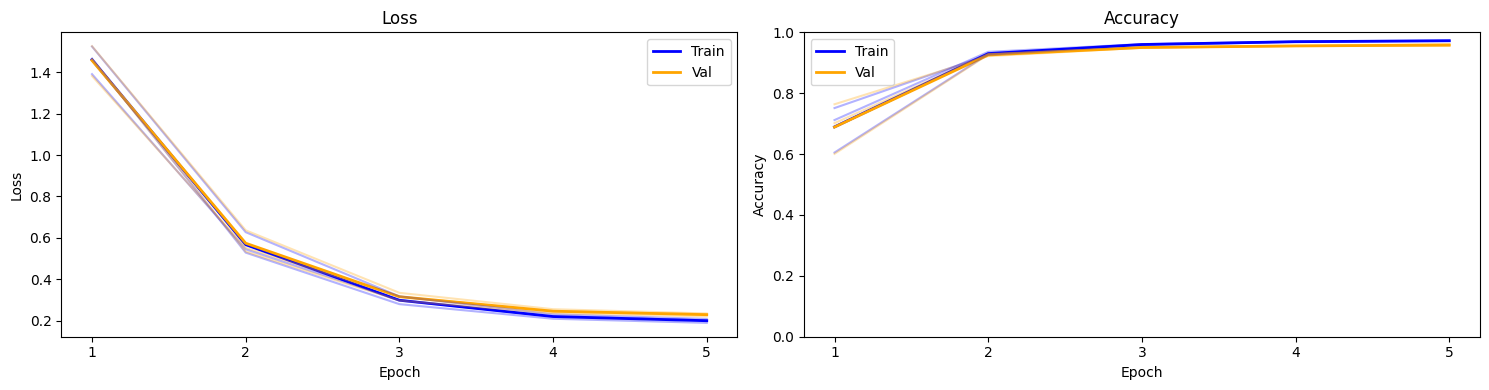

In [45]:
for fol in folders:
    path = 'whisper/checkpoints/pretrained'
    df1_1 = pd.read_csv(f'{path}/{fol}_seed_1/train_losses.csv')
    df1_2 = pd.read_csv(f'{path}/{fol}_seed_1/val_losses.csv')
    df1 = pd.concat([df1_1, df1_2], axis=1).drop_duplicates()
    df1 = df1.loc[:, ~df1.columns.duplicated()]

    df2_1 = pd.read_csv(f'{path}/{fol}_seed_2/train_losses.csv')
    df2_2 = pd.read_csv(f'{path}/{fol}_seed_2/val_losses.csv')
    df2 = pd.concat([df2_1, df2_2], axis=1).drop_duplicates()
    df2 = df2.loc[:, ~df2.columns.duplicated()]

    df3_1 = pd.read_csv(f'{path}/{fol}_seed_3/train_losses.csv')
    df3_2 = pd.read_csv(f'{path}/{fol}_seed_3/val_losses.csv')
    df3 = pd.concat([df3_1, df3_2], axis=1).drop_duplicates()
    df3 = df3.loc[:, ~df3.columns.duplicated()]

    plot_both(df1,df2,df3,f'whisper/checkpoints/pretrained/{fol}.png')